In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt

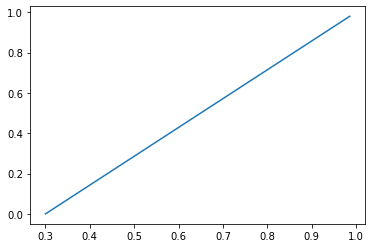

In [2]:
A = 0.7
b = 0.3

X = torch.arange(0,1,0.02) 

y = A*X + b # + torch.rand(50)

plt.plot(y, X)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def plt_predictions(train_data = X_train, train_labels=y_train, test_data=X_test,test_labels=y_test, predictions=None):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='r', s=4, label='Training data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c="c", s=4, label="Predictions")

    plt.legend(prop={"size":14});

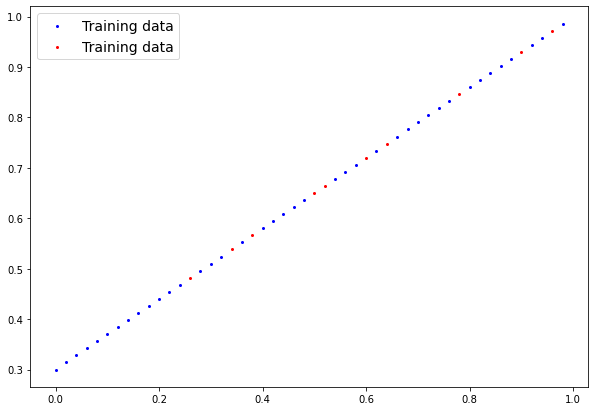

In [5]:
plt_predictions()

In [6]:
class LinearRegressionModule(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [29]:
torch.manual_seed(42)
epoch_count = []
loss_vals = []
test_loss_vals = []
model_0 = LinearRegressionModule()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [30]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds, y_test

(tensor([0.2163, 0.3914, 0.3308, 0.4318, 0.2433, 0.4520, 0.3039, 0.2972, 0.3443,
         0.2568]),
 tensor([0.4820, 0.8460, 0.7200, 0.9300, 0.5380, 0.9720, 0.6640, 0.6500, 0.7480,
         0.5660]))

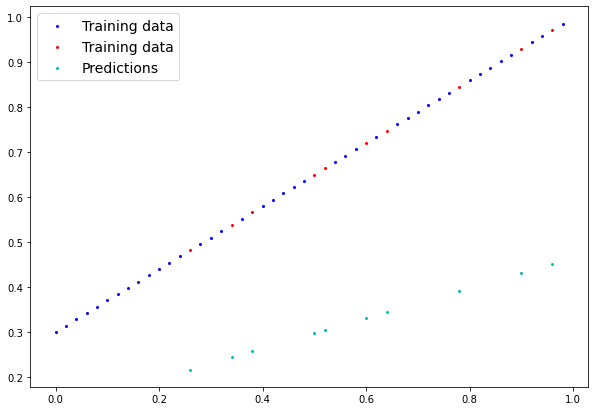

In [31]:
plt_predictions(predictions=y_preds)

In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [33]:
# Loss
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [34]:
epochs = 200
for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():

        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test)
    
    if epoch%10==0:
        print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

    epoch_count.append(epoch)
    loss_vals.append(loss)
    test_loss_vals.append(test_loss)

    
print(model_0.state_dict())

Epoch: 0 | Loss: 0.340311199426651 | Test Loss: 0.3720795214176178
Epoch: 10 | Loss: 0.21864214539527893 | Test Loss: 0.24470801651477814
Epoch: 20 | Loss: 0.10375527292490005 | Test Loss: 0.12293665111064911
Epoch: 30 | Loss: 0.06399796903133392 | Test Loss: 0.06073009967803955
Epoch: 40 | Loss: 0.05161098390817642 | Test Loss: 0.04132990166544914
Epoch: 50 | Loss: 0.04540504142642021 | Test Loss: 0.03398849442601204
Epoch: 60 | Loss: 0.03980403393507004 | Test Loss: 0.029580067843198776
Epoch: 70 | Loss: 0.034203048795461655 | Test Loss: 0.02517164871096611
Epoch: 80 | Loss: 0.028602052479982376 | Test Loss: 0.020763223990797997
Epoch: 90 | Loss: 0.02300105430185795 | Test Loss: 0.016354799270629883
Epoch: 100 | Loss: 0.01740005984902382 | Test Loss: 0.012063920497894287
Epoch: 110 | Loss: 0.011799067258834839 | Test Loss: 0.007895072922110558
Epoch: 120 | Loss: 0.006213896907866001 | Test Loss: 0.003964024595916271
Epoch: 130 | Loss: 0.0006321578985080123 | Test Loss: 0.001116007566

In [35]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.7039], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

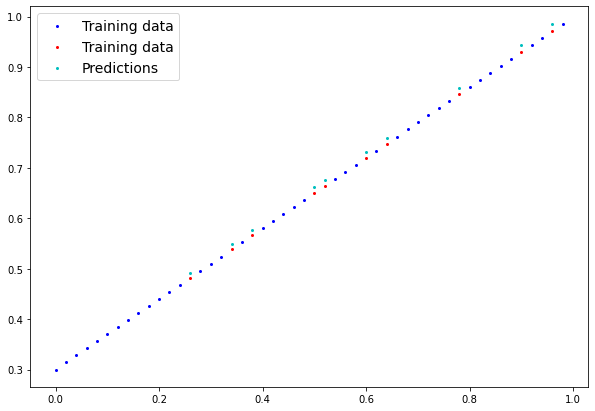

In [36]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plt_predictions(predictions=y_preds_new)

Text(0, 0.5, 'Loss')

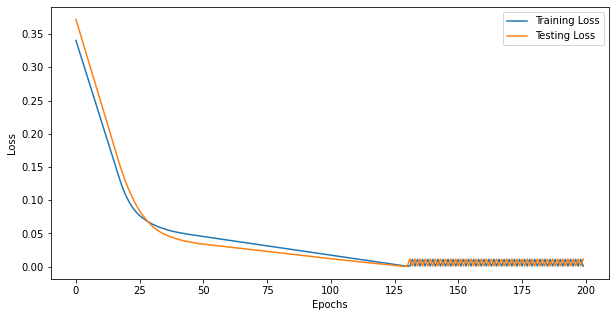

In [40]:
plt.figure(figsize=((10,5)))
plt.plot(epoch_count, loss_vals)
plt.plot(epoch_count, test_loss_vals)
plt.legend(["Training Loss", "Testing Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [54]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_LIN_REG_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [57]:
model_1 = LinearRegressionModule()
model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
model_1.state_dict()

OrderedDict([('weights', tensor([0.7039])), ('bias', tensor([0.3093]))])

In [59]:
model_1.eval()
with torch.inference_mode():
    model_1_preds = model_1(X_test)

model_0.eval()
with torch.inference_mode():
    model_0_preds = model_0(X_test)

model_1_preds == model_0_preds

tensor([True, True, True, True, True, True, True, True, True, True])

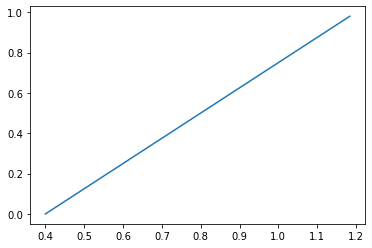

In [97]:
A = 0.8
b = 0.4

X = torch.arange(0,1,0.02) 

y = A*X + b # + torch.rand(50)

plt.plot(y, X)

In [98]:
X = X.unsqueeze(dim=1)
y = y.unsqueeze(dim=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [112]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [113]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.001)

torch.manual_seed(43)

epochs = 1000

for epoch in range(epochs):

    model_2.train()

    y_pred = model_2(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test)

        test_loss = loss_fn(test_pred, y_test)

    
    if epoch%10 == 0 :
        print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

print(model_2.state_dict())

Epoch: 0 | Loss: 0.41296863555908203 | Test Loss: 0.4100306034088135
Epoch: 10 | Loss: 0.40066012740135193 | Test Loss: 0.39749380946159363
Epoch: 20 | Loss: 0.38835155963897705 | Test Loss: 0.3849570155143738
Epoch: 30 | Loss: 0.37604305148124695 | Test Loss: 0.3724202513694763
Epoch: 40 | Loss: 0.36373448371887207 | Test Loss: 0.35988348722457886
Epoch: 50 | Loss: 0.3514259457588196 | Test Loss: 0.3473467230796814
Epoch: 60 | Loss: 0.3391174077987671 | Test Loss: 0.3348099887371063
Epoch: 70 | Loss: 0.3268088698387146 | Test Loss: 0.3222731947898865
Epoch: 80 | Loss: 0.31450027227401733 | Test Loss: 0.309736430644989
Epoch: 90 | Loss: 0.30219176411628723 | Test Loss: 0.29719963669776917
Epoch: 100 | Loss: 0.28988322615623474 | Test Loss: 0.2846628725528717
Epoch: 110 | Loss: 0.27757465839385986 | Test Loss: 0.27212613821029663
Epoch: 120 | Loss: 0.2652661204338074 | Test Loss: 0.2595893442630768
Epoch: 130 | Loss: 0.2529575824737549 | Test Loss: 0.24705255031585693
Epoch: 140 | Loss:

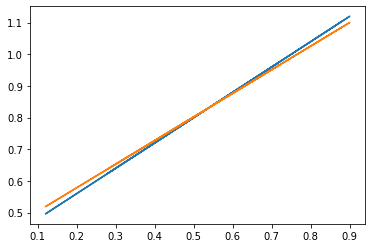

In [120]:
model_2.eval()
with torch.inference_mode():    
    y_preds_2 = model_2(X_test)

